### 17회 2번 코로나 시계열
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

# 신규 확진자 예측

In [1]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem2.csv'
encoded_url = urllib.parse.quote(url, safe=':/')

response = urllib.request.urlopen(encoded_url, context=context)
df = pd.read_csv(response, encoding='utf-8')
df

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...,...
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0
136929,Zimbabwe,2021-11-29,134226.0,4706.0,3067.0,15092171.0,17809.0


In [2]:
df_us = df[df['location'] == 'United States'][['date','new_tests']]
df_us['date'] = pd.to_datetime(df_us.date)
df_us = df_us[df_us['new_tests'] > 0]
# df_us['total_cases'] = np.log(df_us['total_cases'])
df_us = df_us.set_index('date')
df_us = df_us.fillna(0)
df_us

,new_tests
date,
2020-03-01,348.0
2020-03-02,513.0
2020-03-03,617.0
2020-03-04,888.0
2020-03-05,1201.0
...,...
2021-11-23,1119437.0
2021-11-24,1190107.0
2021-11-25,533235.0


In [3]:
print(len(pd.date_range('2020-03-01', '2021-11-27')))
df_us.index

637


DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27'],
              dtype='datetime64[ns]', name='date', length=637, freq=None)

<AxesSubplot:xlabel='date'>

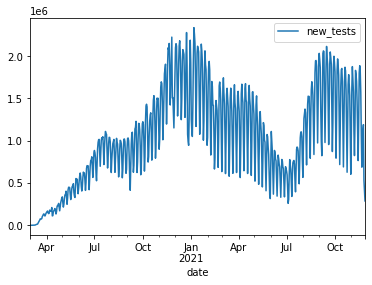

In [4]:
df_us.plot()

<AxesSubplot:xlabel='date'>

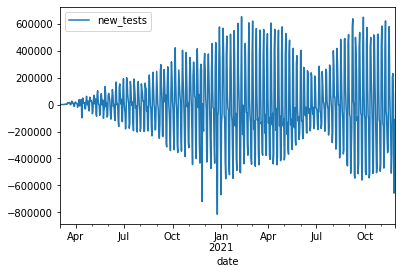

In [5]:
df_us.diff()[1:].plot()

<AxesSubplot:xlabel='date'>

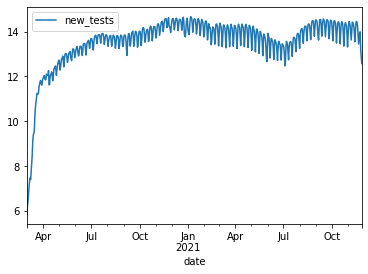

In [6]:
import numpy as np

np.log(df_us).plot()

<AxesSubplot:xlabel='date'>

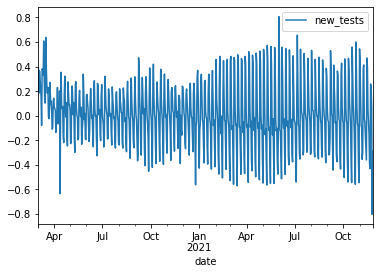

In [7]:
import numpy as np

np.log(df_us).diff()[1:].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -2.155716
p-value: 0.222709
귀무가설 채택, 단위근 존재 O, 정상성 만족 X



In [9]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column].diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -3.279123
p-value: 0.015838
귀무가설 기각, 단위근 존재 X, 정상성을 만족



In [10]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(np.log(df_us[column]))

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -2.809374
p-value: 0.056947
귀무가설 채택, 단위근 존재 O, 정상성 만족 X



In [11]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(np.log(df_us[column]).diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -7.620860
p-value: 0.000000
귀무가설 기각, 단위근 존재 X, 정상성을 만족



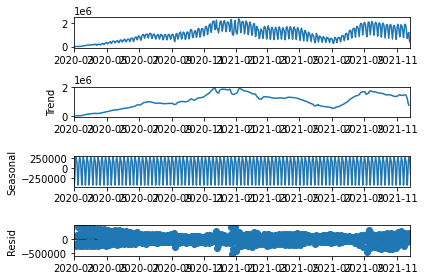

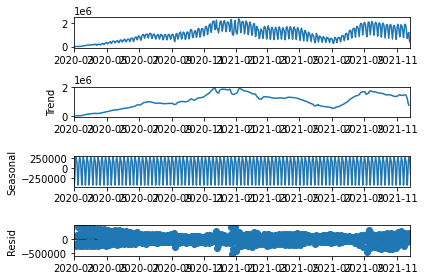

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df_us, model='additive')

result.plot()

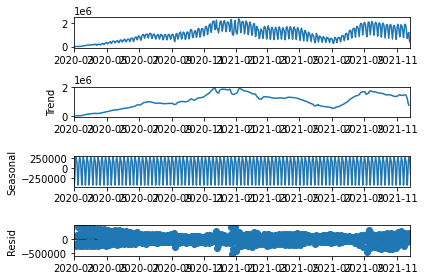

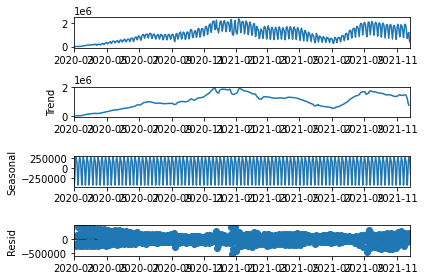

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df_us, model='additive')

result.plot()

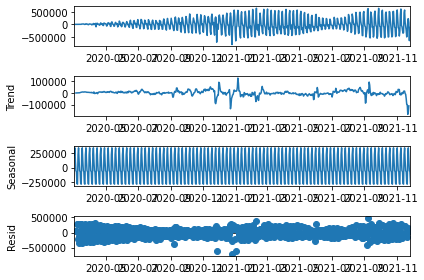

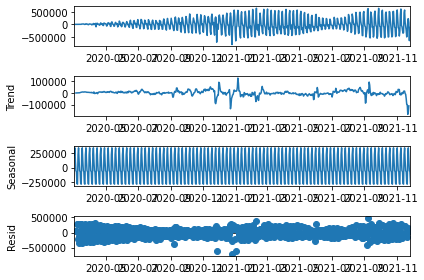

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df_us.diff()[1:], model='additive')

result.plot()

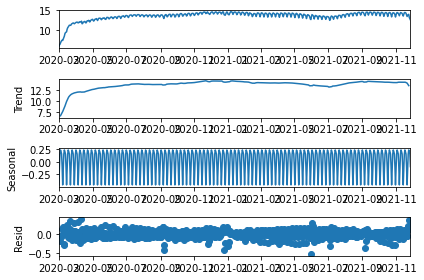

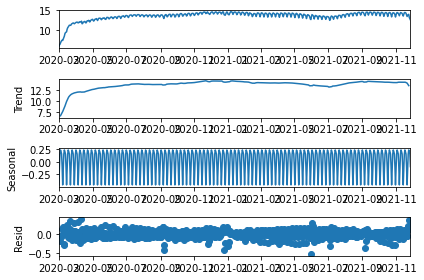

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(np.log(df_us), model='additive')

result.plot()

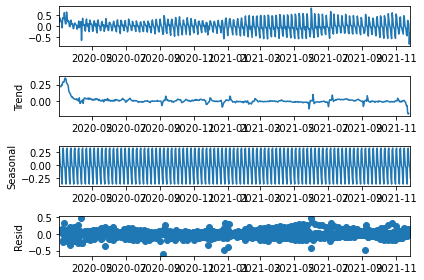

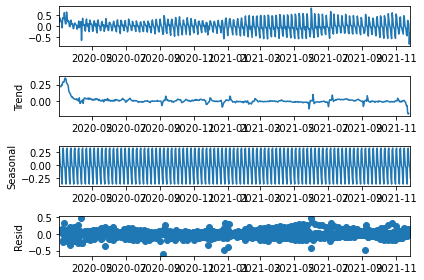

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(np.log(df_us).diff()[1:], model='additive')

result.plot()

AR (Auto Regression, 자기회귀)

AR은 시계열상의 과거 관측값을 이용하여 예측모델을 생성하는 방법이다.

즉, 시계열 데이터 자신의 과거 데이터를 통해서 미래를 예측하는 방법이다.

과거 P개의 관측값과 선형결합으로 예측하는 모델을 P차 AR모델이라고 하고 AR(P)라고 표현한다.

* <font color='red'>Auto-Regressive (AR) p = 1</font>: 
    
    $\color{red}{y_t = c + \alpha_1 y_{t-1} + \epsilon_t}$

* <font color='red'>Auto-Regressive (AR) filter (long term)</font>: 
    
    $\color{red}{y_t = c + \alpha_1 y_{t-1} + \dots \alpha_{\color{red}p}y_{t-\color{red}p} + \epsilon_t = c + \sum_{i=1}^p{\alpha_i}y_{t-i} + \epsilon_t}$  -> p

In [17]:
from statsmodels.tsa.ar_model import AutoReg

train = df_us[:len(df_us) - 10]
test = df_us[len(df_us)-10:]
us_diff = df_us.diff()[1:]
train_diff = us_diff[:len(us_diff) - 10]
test_diff = us_diff[len(us_diff) - 10:]

train_log = np.log(train)
test_log = np.log(test)
us_log_diff = np.log(df_us).diff()[1:]
train_log_diff = us_log_diff[:len(us_diff) - 10]
test_log_diff = us_log_diff[len(us_diff) - 10:]

In [18]:
model = AutoReg(train, lags=1)
model_fit = model.fit()

model_fit.summary()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                     AutoReg(1)   Log Likelihood               -8685.639
Method:               Conditional MLE   S.D. of innovations         256756.674
Date:                Sat, 26 Aug 2023   AIC                          17377.278
Time:                        11:04:37   BIC                          17390.596
Sample:                    03-02-2020   HQIC                         17382.453
                         - 11-17-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.185e+05   2.15e+04      5.497      0.000    7.62e+04    1.61e+05
new_tests.L1     0.8890      0.018     48.787      0.000       0.853       0.925
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1249           +0.0000j            1.1249            0.0000
-----------------------------------------------------------------------------
"""

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Figure size 720x432 with 0 Axes>

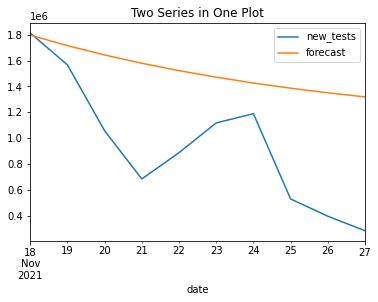

RMSE :  443534457253.49866
MAE :  569716.8974481922
MAPE :  1.0727909980489252


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error ,mean_absolute_error
import matplotlib.pyplot as plt

# # 예측
start = len(train)
end = start + 9  # 10개의 미래 값 예측
forecast = model_fit.predict(start=start, end=end)

plt.figure(figsize=(10, 6))
test.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test['new_tests'], forecast))

In [20]:
model = AutoReg(train_diff, lags=1)
model_fit = model.fit()

model_fit.summary()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:                     AutoReg(1)   Log Likelihood               -8640.949
Method:               Conditional MLE   S.D. of innovations         244404.436
Date:                Sat, 26 Aug 2023   AIC                          17287.898
Time:                        11:04:37   BIC                          17301.211
Sample:                    03-03-2020   HQIC                         17293.071
                         - 11-17-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1917.0681   9776.758      0.196      0.845   -1.72e+04    2.11e+04
new_tests.L1     0.3821      0.037     10.336      0.000       0.310       0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6170           +0.0000j            2.6170            0.0000
-----------------------------------------------------------------------------
"""

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Figure size 720x432 with 0 Axes>

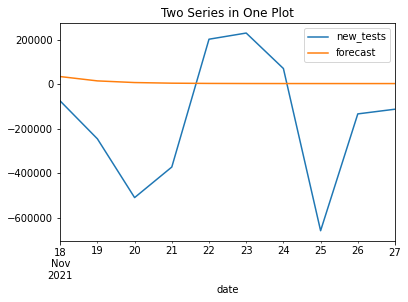

RMSE :  104967730448.90851
MAE :  266468.0991189584
MAPE :  1.0527524443642071


In [21]:
# # 예측
start = len(train_diff)
end = start + 9  # 10개의 미래 값 예측
forecast = model_fit.predict(start=start, end=end)

plt.figure(figsize=(10, 6))
test_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_diff['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_tests'], forecast))

In [22]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_log, lags=1)
model_fit = model.fit()

model_fit.summary()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                     AutoReg(1)   Log Likelihood                 -40.379
Method:               Conditional MLE   S.D. of innovations              0.258
Date:                Sat, 26 Aug 2023   AIC                             86.759
Time:                        11:04:37   BIC                            100.077
Sample:                    03-02-2020   HQIC                            91.933
                         - 11-17-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8361      0.120      6.950      0.000       0.600       1.072
new_tests.L1     0.9393      0.009    106.149      0.000       0.922       0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0646           +0.0000j            1.0646            0.0000
-----------------------------------------------------------------------------
"""

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Figure size 720x432 with 0 Axes>

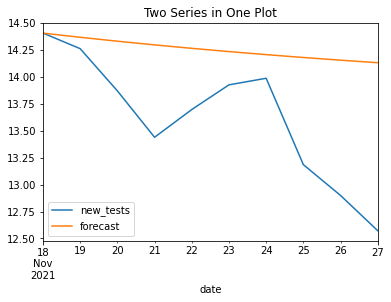

RMSE :  135.70487757944102
MAE :  11.649101476864981
MAPE :  4.462266772459652


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error ,mean_absolute_error
import matplotlib.pyplot as plt

# # 예측
start = len(train_log)
end = start + 9  # 10개의 미래 값 예측
forecast = model_fit.predict(start=start, end=end)

plt.figure(figsize=(10, 6))
test_log.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(np.log(test_log['new_tests']), forecast))
print('MAE : ', mean_absolute_error(np.log(test_log['new_tests']), forecast))
print('MAPE : ', mean_absolute_percentage_error(np.log(test_log['new_tests']), forecast))

In [24]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_log_diff, lags=1)
model_fit = model.fit()

model_fit.summary()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:                     AutoReg(1)   Log Likelihood                 -38.995
Method:               Conditional MLE   S.D. of innovations              0.258
Date:                Sat, 26 Aug 2023   AIC                             83.989
Time:                        11:04:38   BIC                             97.303
Sample:                    03-03-2020   HQIC                            89.162
                         - 11-17-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0095      0.010      0.917      0.359      -0.011       0.030
new_tests.L1     0.2687      0.038      6.987      0.000       0.193       0.344
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.7211           +0.0000j            3.7211            0.0000
-----------------------------------------------------------------------------
"""

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Figure size 720x432 with 0 Axes>

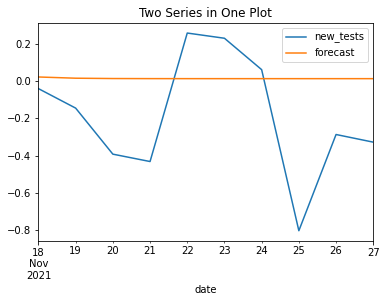

RMSE :  0.13725174800835585
MAE :  0.30391297311974574
MAPE :  1.0492872365202366


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error ,mean_absolute_error
import matplotlib.pyplot as plt

# # 예측
start = len(train_log_diff)
end = start + 9  # 10개의 미래 값 예측
forecast = model_fit.predict(start=start, end=end)

plt.figure(figsize=(10, 6))
test_log_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_log_diff, forecast))
print('MAE : ', mean_absolute_error(test_log_diff, forecast))
print('MAPE : ', mean_absolute_percentage_error(test_log_diff, forecast))

MA (Moving Average, 이동평균)

MA는 과거 예측 오차를 기반하여 예측하는 것이다.

과거 q개의 예측오차의 선형결합으로 예측하는 모델을 q차 MA모델이라 하고 MA(q)라고 표현한다.

* <font color='red'>Moving Average (MA) filter (short term)</font>:

    $\color{red}{y_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} = c + \epsilon_t + \sum_{i=1}^q{\beta_i}\epsilon_{t-i}} $  -> q

AR(p) = MA(∞)

[reference](https://otexts.com/fppkr/MA.html)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# MA 모델 구축
# order는 (p, d, q) 형태로 지정되며, 여기서 p는 AR 차수, d는 차분 차수, q는 MA 차수
# MA 모델은 statsmodel에서 제공하지 않기 때문에 ARIMA 모델을 이용하여 사용
model = ARIMA(train, order=(0, 0, 1))  # 여기서는 MA(1) 모델을 사용
model_fit = model.fit()

model_fit.summary()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8881.661
Date:                Sat, 26 Aug 2023   AIC                          17769.321
Time:                        11:04:38   BIC                          17782.644
Sample:                    03-01-2020   HQIC                         17774.497
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e+06   4.72e+04     22.058      0.000    9.49e+05    1.13e+06
ma.L1          0.9409      0.022     43.206      0.000       0.898       0.984
sigma2      1.892e+11      0.017   1.09e+13      0.000    1.89e+11    1.89e+11
===================================================================================
Ljung-Box (L1) (Q):                 313.39   Jarque-Bera (JB):                20.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.30
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.11e+28. Standard errors may be unstable.
"""

Ljung-Box(L1) : fitting 이후의 잔차가 lag에 따라 correlated 되어 있는지 판단하는 것, 잔차가 white noise를 따르는지 판단하는 테스트
- 귀무가설 : 잔차가 white noise를 따른다.
- 대립가설 : 잔차가 white noise를 따르지 않는다.
- 여기서는 Prob이 0.00이므로 귀무가설을 기각하고 잔차가 white noise를 따르지 않음(0.05 이상이어야 좋음)


Jarque-Bera 테스트는 잔차의 분포가 normal distribution을 따르는지에 대한 테스트
- 귀무가설 : 잔차가 normal distribution을 따른다.
- 대립가설 : 잔차가 normal distribution을 따르지 않는다.
- 여기서는 Prob이 0.00이므로 귀무가설을 기각하고, 잔차가 normal이 아님(0.05 이상이어야 좋음)

heteroskedasticity는 각 시간대 별 잔차의 분산이 일정한지에 대한 테스트
- 귀무가설 : 잔차의 분산이 일정하다.
- 대립가설 : 잔차의 분산이 일정하지 않다.
- 여기서는 0.24이므로 귀무가설을 채택하고 잔차의 분산은 일정함

<Figure size 720x432 with 0 Axes>

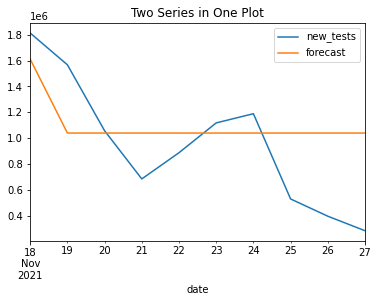

RMSE :  172913894183.1336
MAE :  337859.41613562254
MAPE :  0.6506054540002875


In [27]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test['new_tests'], forecast))

### acf, pacf

[Must_read_ref](https://velog.io/@sjina0722/시계열분석-ARIMA-모델)

[ACF(Auto Correlation Function)](https://datalabbit.tistory.com/112)

시차에 따른 일련의 자기상관을 자기상관함수(ACF)라고 한다.
ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워진다.(시차가 멀어질수록 당연히 상관관계는 떨어지게 된다. 물론 seasonal한 데이터의 겨우 특정주기에 따라 다시 튀어오르는 구간이 있다.)
ACF는 시계열의 정상성을 평가할 때 유용하다.
- 정상 시계열의 경우 ACF는 상대적으로 빨리 0(상관관계가 0)으로 접근한다.
- 비정상 시계열의 경우 ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.
- 
[PACF(Partial Auto Correlation Function)](https://datalabbit.tistory.com/113)

시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타낸다.
즉, t시점과 t-1의 연관성, 그리고 t와 t-2의 연관성(이때 t-1와의 연관성은 제외한다. 순수하게 특정 시점간의 연관성(correlation)만 생각하고 사이에 있는 시점들의 연관성은 제외한다.)
시차에 따른 일련의 편자기 상관을 편자기 상관함수(PACF)라고 한다.


![images-sjina0722-post-e8fc0b78-cc11-4dab-b6c8-fa60021e4552-image](https://github.com/Ssunbell/ADP_study/assets/97590480/132690f4-1528-44ea-9676-ba6690624513)

acf, pcaf 그래프를 보고 이 시계열 데이터가 AR의 성질을 띄는지 or MA의 성질을 띄는지 or 둘다를 가지고 있는지 판단.


/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


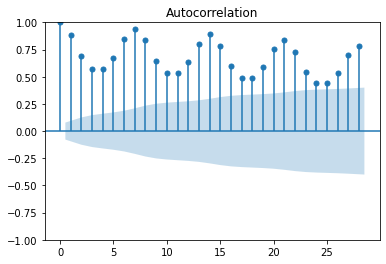

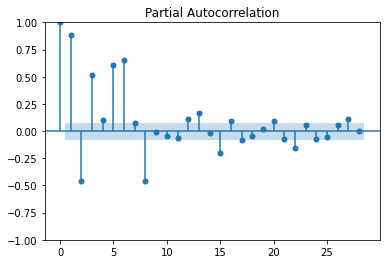

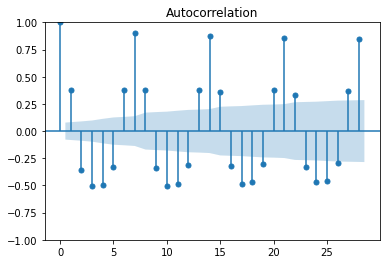

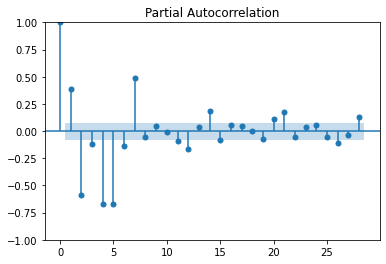

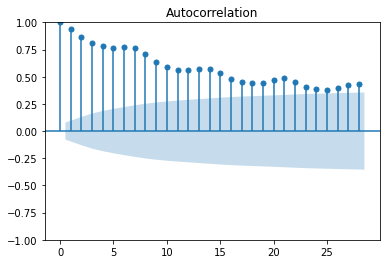

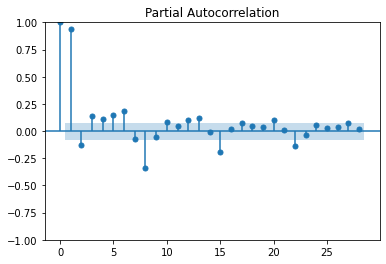

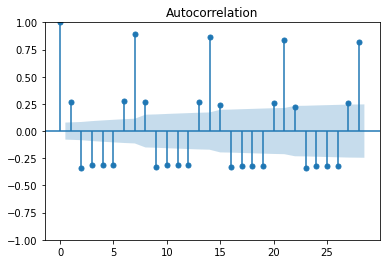

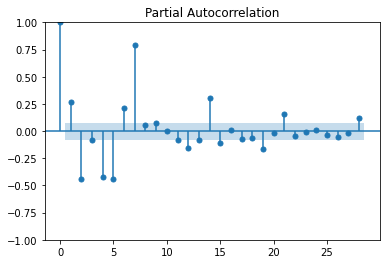

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train)
plot_pacf(train)
plot_acf(train_diff)
plot_pacf(train_diff)
plot_acf(train_log)
plot_pacf(train_log)
plot_acf(train_log_diff)
plot_pacf(train_log_diff)
plt.show()

## 그러면 AR, MA의 p, q를 어떻게 선택하지?

### AIC, BIC 기준으로!

AIC, BIC값이 낮을수록 likelyhood를 maximize하는 값이기 때문에 해당 값을 기준으로 모델 grid search!

[ref](https://rk1993.tistory.com/144)

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

def model_selection(data):
    model_selection_list = []
    for p in range(10):
        for q in range(10):
            for d in range(2):
                model = ARIMA(data, order=(p, d, q))  # 여기서는 MA(1) 모델을 사용
                model_fit = model.fit()
                aic = model_fit.aic
                bic = model_fit.bic
                model_selection_list.append((p,d,q,aic,bic))
    model_selection_list = sorted(model_selection_list, key=lambda x: (x[-2], x[-1]))
    print(model_selection_list[:5])
    
    return model_selection_list[0][:3]

In [30]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = model_selection(train)
print('best order', p, d, q)

# order는 (p, d, q) 형태로 지정되며, 여기서 p는 AR 차수, d는 차분 차수, q는 MA 차수
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

model_fit.summary()

[(7, 1, 9, 16054.012790886889, 16129.48174719559), (6, 1, 8, 16058.28579403748, 16124.876049603981), (8, 1, 9, 16060.570003987978, 16140.478310667779), (8, 1, 8, 16060.940703191645, 16136.409659500347), (6, 1, 9, 16061.520609651257, 16132.550215588859)]
best order 7 1 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                 ARIMA(7, 1, 9)   Log Likelihood               -8010.006
Date:                Sat, 26 Aug 2023   AIC                          16054.013
Time:                        11:07:20   BIC                          16129.482
Sample:                    03-01-2020   HQIC                         16083.335
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0106      0.078     -0.135      0.892      -0.164       0.143
ar.L2         -0.0991      0.070     -1.408      0.159      -0.237       0.039
ar.L3         -0.0261      0.072     -0.363      0.717      -0.167       0.115
ar.L4         -0.0721      0.074     -0.979      0.328      -0.217       0.072
ar.L5         -0.0576      0.069     -0.831      0.406      -0.193       0.078
ar.L6         -0.0213      0.079     -0.269      0.788      -0.176       0.133
ar.L7          0.8935      0.065     13.678      0.000       0.765       1.021
ma.L1          0.0042      0.081      0.051      0.959      -0.155       0.163
ma.L2         -0.2937      0.069     -4.269      0.000      -0.429      -0.159
ma.L3         -0.1583      0.072     -2.194      0.028      -0.300      -0.017
ma.L4         -0.0356      0.054     -0.662      0.508      -0.141       0.070
ma.L5         -0.0154      0.054     -0.285      0.776      -0.122       0.091
ma.L6          0.0069      0.056      0.124      0.901      -0.102       0.116
ma.L7         -0.5508      0.033    -16.819      0.000      -0.615      -0.487
ma.L8          0.0734      0.033      2.223      0.026       0.009       0.138
ma.L9          0.2399      0.036      6.669      0.000       0.169       0.310
sigma2      8.055e+09   2.32e-11   3.47e+20      0.000    8.06e+09    8.06e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12141.17
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               5.38   Skew:                            -2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.66e+35. Standard errors may be unstable.
"""

<Figure size 720x432 with 0 Axes>

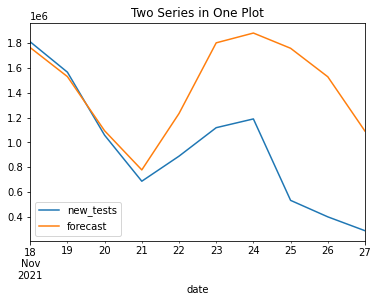

RMSE :  450518215581.85986
MAE :  508960.1592795956
MAPE :  0.9701444582032579


In [31]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test['new_tests'], forecast))

In [32]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = model_selection(train_diff)
print('best order', p, d, q)

model = ARIMA(train_diff, order=(p, d, q)) 
model_fit = model.fit()

model_fit.summary()

[(6, 1, 9, 16037.388495907275, 16108.392522303056), (7, 1, 9, 16039.509077162333, 16114.950855207851), (9, 1, 9, 16040.984814544583, 16125.302095889574), (8, 1, 8, 16041.816395894655, 16117.258173940174), (8, 1, 9, 16041.864022788657, 16121.743552483913)]
best order 6 1 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:                 ARIMA(6, 1, 9)   Log Likelihood               -8002.694
Date:                Sat, 26 Aug 2023   AIC                          16037.388
Time:                        11:10:21   BIC                          16108.393
Sample:                    03-02-2020   HQIC                         16064.978
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9889      0.013    -74.507      0.000      -1.015      -0.963
ar.L2         -1.0000      0.010   -105.175      0.000      -1.019      -0.981
ar.L3         -0.9917      0.012    -80.896      0.000      -1.016      -0.968
ar.L4         -0.9989      0.013    -75.053      0.000      -1.025      -0.973
ar.L5         -0.9939      0.010    -96.401      0.000      -1.014      -0.974
ar.L6         -0.9792      0.013    -76.591      0.000      -1.004      -0.954
ma.L1         -0.0051      0.035     -0.144      0.885      -0.074       0.064
ma.L2         -0.3840      0.035    -10.991      0.000      -0.452      -0.316
ma.L3         -0.1725      0.049     -3.517      0.000      -0.269      -0.076
ma.L4         -0.0622      0.044     -1.410      0.159      -0.149       0.024
ma.L5         -0.0612      0.051     -1.205      0.228      -0.161       0.038
ma.L6          0.0329      0.040      0.813      0.416      -0.046       0.112
ma.L7         -0.6221      0.027    -22.980      0.000      -0.675      -0.569
ma.L8          0.1068      0.035      3.054      0.002       0.038       0.175
ma.L9          0.2093      0.033      6.401      0.000       0.145       0.273
sigma2      8.303e+09   3.69e-12   2.25e+21      0.000     8.3e+09     8.3e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13016.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                            -2.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+36. Standard errors may be unstable.
"""

<Figure size 720x432 with 0 Axes>

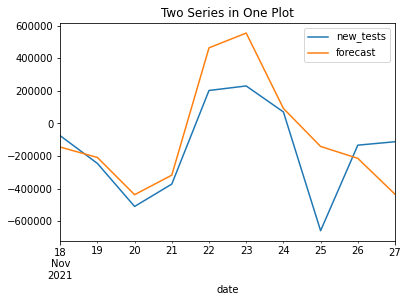

RMSE :  56428536193.55155
MAE :  175819.8881921459
MAPE :  0.8642441543360249


In [33]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_diff['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_tests'], forecast))

<Figure size 720x432 with 0 Axes>

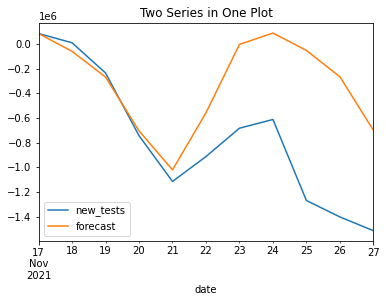

RMSE :  411676603490.48004
MAE :  467035.8184854766
MAPE :  1.07887058391214


In [34]:
date = train_diff.iloc[-1].name
values = train_diff.iloc[-1].to_dict()

test_diff_ori = test_diff.copy()
test_diff_ori.loc[date] = values
test_diff_ori = test_diff_ori.sort_index().cumsum()[1:]

front = pd.Series(values.values(), index=[date])
forecast_ori = pd.concat([front, forecast])
forecast_ori = forecast_ori.sort_index().cumsum()[1:]

plt.figure(figsize=(10, 6))
test_diff_ori.plot(label='true', legend=True)
forecast_ori.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff_ori['new_tests'], forecast_ori))
print('MAE : ', mean_absolute_error(test_diff_ori['new_tests'], forecast_ori))
print('MAPE : ', mean_absolute_percentage_error(test_diff_ori['new_tests'], forecast_ori))

In [35]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = model_selection(train_log)
print('best order', p, d, q)

model = ARIMA(train_log, order=(p, d, q)) 
model_fit = model.fit()

model_fit.summary()

[(8, 1, 9, -1071.4557202033498, -991.547413523548), (9, 1, 8, -1070.825469121547, -990.9171624417453), (7, 1, 9, -1069.8750310626228, -994.4060747539212), (9, 1, 7, -1069.7220971092036, -994.2531408005019), (9, 1, 9, -1067.7061990892485, -983.3585420383466)]
best order 8 1 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                 ARIMA(8, 1, 9)   Log Likelihood                 553.728
Date:                Sat, 26 Aug 2023   AIC                          -1071.456
Time:                        11:13:20   BIC                           -991.547
Sample:                    03-01-2020   HQIC                         -1040.408
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1891      0.261     -0.725      0.469      -0.700       0.322
ar.L2         -0.0941      0.031     -3.026      0.002      -0.155      -0.033
ar.L3         -0.0942      0.029     -3.278      0.001      -0.151      -0.038
ar.L4         -0.0947      0.031     -3.095      0.002      -0.155      -0.035
ar.L5         -0.0920      0.029     -3.148      0.002      -0.149      -0.035
ar.L6         -0.0897      0.029     -3.085      0.002      -0.147      -0.033
ar.L7          0.9027      0.029     31.507      0.000       0.847       0.959
ar.L8          0.0932      0.250      0.372      0.710      -0.398       0.584
ma.L1          0.2078      0.261      0.797      0.425      -0.303       0.719
ma.L2         -0.0578      0.047     -1.219      0.223      -0.151       0.035
ma.L3          0.1476      0.052      2.834      0.005       0.046       0.250
ma.L4          0.1634      0.052      3.131      0.002       0.061       0.266
ma.L5          0.1477      0.059      2.483      0.013       0.031       0.264
ma.L6          0.2524      0.053      4.792      0.000       0.149       0.356
ma.L7         -0.5651      0.064     -8.883      0.000      -0.690      -0.440
ma.L8          0.0498      0.183      0.272      0.785      -0.309       0.408
ma.L9          0.1997      0.044      4.577      0.000       0.114       0.285
sigma2         0.0097      0.000     28.530      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              2468.50
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -1.13
Prob(H) (two-sided):                  0.64   Kurtosis:                        12.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 720x432 with 0 Axes>

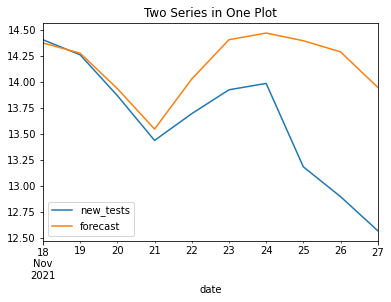

RMSE :  0.5913421598234097
MAE :  0.5509161502024786
MAPE :  0.04195469724029337


In [36]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test_log.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_log['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_log['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_log['new_tests'], forecast))

In [37]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = model_selection(train_log_diff)
print('best order', p, d, q)

model = ARIMA(train_log_diff, order=(8, 1, 7))
model_fit = model.fit()

model_fit.summary()

[(8, 1, 7, -1084.5491919345282, -1013.5451655387458), (6, 1, 9, -1083.9865313390742, -1012.9825049432918), (8, 1, 8, -1083.3395459785947, -1007.8977679330759), (7, 0, 9, -1075.8391416503127, -995.930834970511), (8, 0, 9, -1073.6553888894678, -989.3077318385659)]
best order 8 1 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:                 ARIMA(8, 1, 7)   Log Likelihood                 558.275
Date:                Sat, 26 Aug 2023   AIC                          -1084.549
Time:                        11:16:24   BIC                          -1013.545
Sample:                    03-02-2020   HQIC                         -1056.959
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1002      0.053    -20.943      0.000      -1.203      -0.997
ar.L2         -1.3326      0.092    -14.539      0.000      -1.512      -1.153
ar.L3         -1.3325      0.090    -14.724      0.000      -1.510      -1.155
ar.L4         -1.3313      0.091    -14.631      0.000      -1.510      -1.153
ar.L5         -1.3277      0.090    -14.770      0.000      -1.504      -1.152
ar.L6         -1.3248      0.089    -14.811      0.000      -1.500      -1.150
ar.L7         -0.3295      0.089     -3.702      0.000      -0.504      -0.155
ar.L8         -0.2324      0.052     -4.456      0.000      -0.335      -0.130
ma.L1          0.1438      0.052      2.789      0.005       0.043       0.245
ma.L2          0.0565      0.048      1.178      0.239      -0.038       0.150
ma.L3          0.0473      0.035      1.360      0.174      -0.021       0.115
ma.L4          0.0437      0.035      1.259      0.208      -0.024       0.112
ma.L5          0.0335      0.041      0.827      0.408      -0.046       0.113
ma.L6          0.1526      0.032      4.770      0.000       0.090       0.215
ma.L7         -0.6577      0.029    -22.530      0.000      -0.715      -0.601
sigma2         0.0095      0.000     29.275      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              2814.99
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -1.45
Prob(H) (two-sided):                  0.58   Kurtosis:                        12.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 720x432 with 0 Axes>

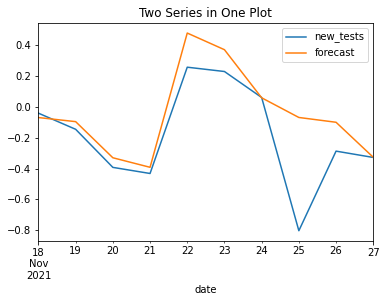

RMSE :  0.0652253975831245
MAE :  0.14683155388638647
MAPE :  0.43738349793934256


In [38]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test_log_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_log_diff['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_log_diff['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_log_diff['new_tests'], forecast))

<Figure size 720x432 with 0 Axes>

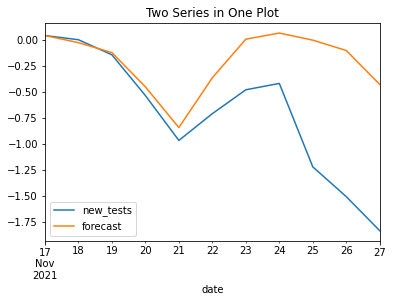

RMSE :  0.5508304088565802
MAE :  0.5097026692380383
MAPE :  0.9815402891228625


In [39]:
date = train_log_diff.iloc[-1].name
values = train_log_diff.iloc[-1].to_dict()

test_log_diff_ori = test_log_diff.copy()
test_log_diff_ori.loc[date] = values
test_log_diff_ori = test_log_diff_ori.sort_index().cumsum()[1:]

front = pd.Series(values.values(), index=[date])
forecast_ori = pd.concat([front, forecast])
forecast_ori = forecast_ori.sort_index().cumsum()[1:]

plt.figure(figsize=(10, 6))
test_log_diff_ori.plot(label='true', legend=True)
forecast_ori.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_log_diff_ori['new_tests'], forecast_ori))
print('MAE : ', mean_absolute_error(test_log_diff_ori['new_tests'], forecast_ori))
print('MAPE : ', mean_absolute_percentage_error(test_log_diff_ori['new_tests'], forecast_ori))

### SARIMA

<img width="856" alt="스크린샷 2023-08-25 오후 11 41 50" src="https://github.com/Ssunbell/TIL/assets/97590480/b9a0b560-9b58-484c-8137-79e9e36cf041">

ARIMA에 seasonal만 추가한 모델입니다.

statsmodel에서 제공하는 SARIMA는 seasonal harameter를 설정해줘야 합니다.


seasonal_order(P, D, Q, S) : P, D, Q는 저희가 알고 있는 arima order의 p, d, q와 동일합니다. 따라서 해당 부분은 grid search로 찾아주시면 됩니다.

- S : 계절성을 의미하는 파라미터로 seasonal decomposition에서 확인한 계절성 주기를 입력해주시거나 일반적인 주기성을 띄는 일(1), 주(7), 월(30), 분기(90), 연(365)단위로 grid search를 돌리셔도 됩니다.

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_diff, order=(6,1,9), seasonal_order=(0,0,0,7))
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:               SARIMAX(6, 1, 9)   Log Likelihood               -8002.694
Date:                Sat, 26 Aug 2023   AIC                          16037.388
Time:                        11:16:26   BIC                          16108.393
Sample:                    03-02-2020   HQIC                         16064.978
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9889      0.013    -74.507      0.000      -1.015      -0.963
ar.L2         -1.0000      0.010   -105.175      0.000      -1.019      -0.981
ar.L3         -0.9917      0.012    -80.896      0.000      -1.016      -0.968
ar.L4         -0.9989      0.013    -75.053      0.000      -1.025      -0.973
ar.L5         -0.9939      0.010    -96.401      0.000      -1.014      -0.974
ar.L6         -0.9792      0.013    -76.591      0.000      -1.004      -0.954
ma.L1         -0.0051      0.035     -0.144      0.885      -0.074       0.064
ma.L2         -0.3840      0.035    -10.991      0.000      -0.452      -0.316
ma.L3         -0.1725      0.049     -3.517      0.000      -0.269      -0.076
ma.L4         -0.0622      0.044     -1.410      0.159      -0.149       0.024
ma.L5         -0.0612      0.051     -1.205      0.228      -0.161       0.038
ma.L6          0.0329      0.040      0.813      0.416      -0.046       0.112
ma.L7         -0.6221      0.027    -22.980      0.000      -0.675      -0.569
ma.L8          0.1068      0.035      3.054      0.002       0.038       0.175
ma.L9          0.2093      0.033      6.401      0.000       0.145       0.273
sigma2      8.303e+09   3.69e-12   2.25e+21      0.000     8.3e+09     8.3e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13016.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                            -2.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+36. Standard errors may be unstable.
"""

<Figure size 720x432 with 0 Axes>

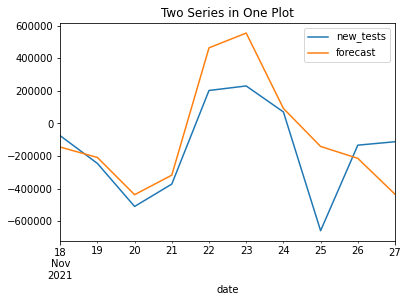

RMSE :  56428536193.55155
MAE :  175819.8881921459
MAPE :  0.8642441543360249


In [41]:
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_diff['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_tests'], forecast))

<Figure size 720x432 with 0 Axes>

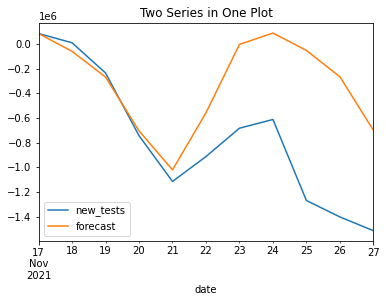

RMSE :  411676603490.48004
MAE :  467035.8184854766
MAPE :  1.07887058391214


In [42]:
date = train_diff.iloc[-1].name
values = train_diff.iloc[-1].to_dict()

test_diff_ori = test_diff.copy()
test_diff_ori.loc[date] = values
test_diff_ori = test_diff_ori.sort_index().cumsum()[1:]

front = pd.Series(values.values(), index=[date])
forecast_ori = pd.concat([front, forecast])
forecast_ori = forecast_ori.sort_index().cumsum()[1:]

plt.figure(figsize=(10, 6))
test_diff_ori.plot(label='true', legend=True)
forecast_ori.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff_ori['new_tests'], forecast_ori))
print('MAE : ', mean_absolute_error(test_diff_ori['new_tests'], forecast_ori))
print('MAPE : ', mean_absolute_percentage_error(test_diff_ori['new_tests'], forecast_ori))

<img width="379" alt="스크린샷 2023-08-25 오후 9 29 58" src="https://github.com/Ssunbell/TIL/assets/97590480/ff489fc5-af33-4e1c-ba16-34e361f0e365">

- one-to-one (univariate; 단변량) : 하나의 feature 변수에서 하나의 target 변수를 예측. 시계열에서는 feature = target
- many-to-one (univariate with exogenous variable) : 여러개의 feature 변수에서 하나의 target 변수를 예측. 시계열에서는 하나의 feature + 외생변수로 target을 예측
- many-to-many (multivariate; 다변량) : 여러개의 feature 변수로 여러개의 target 변수를 예측. 시계열에서는 faeture = target

In [43]:
df_us = df[df['location'] == 'United States'][['date','new_tests', 'new_vaccinations']]
df_us['date'] = pd.to_datetime(df_us.date)
df_us = df_us[df_us['new_tests'] > 0]
# df_us['total_cases'] = np.log(df_us['total_cases'])
df_us = df_us.set_index('date')
df_us = df_us.fillna(0)
df_us

,new_tests,new_vaccinations
date,,
2020-03-01,348.0,0.0
2020-03-02,513.0,0.0
2020-03-03,617.0,0.0
2020-03-04,888.0,0.0
2020-03-05,1201.0,0.0
...,...,...
2021-11-23,1119437.0,1395130.0
2021-11-24,1190107.0,976872.0
2021-11-25,533235.0,16660.0


<AxesSubplot:xlabel='date'>

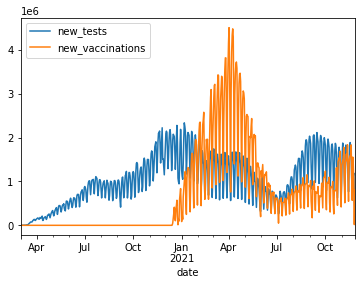

In [44]:
df_us.plot()

외생변수로는 카테고리컬 or numeric 데이터 또한 가능합니다.

In [45]:
vac_diff = df_us['new_vaccinations'].diff()[1:]
train_exog = vac_diff[:len(vac_diff)-10]
test_exog = vac_diff[len(vac_diff)-10:]

In [46]:
model = ARIMA(train_diff, order=(6, 1, 9), exog=train_exog)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  626
Model:                 ARIMA(6, 1, 9)   Log Likelihood               -7978.756
Date:                Sat, 26 Aug 2023   AIC                          15991.511
Time:                        11:16:29   BIC                          16066.953
Sample:                    03-02-2020   HQIC                         16020.825
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
new_vaccinations     0.1629      0.018      8.810      0.000       0.127       0.199
ar.L1               -0.9374      0.036    -25.767      0.000      -1.009      -0.866
ar.L2               -1.0048      0.015    -66.090      0.000      -1.035      -0.975
ar.L3               -0.9486      0.027    -35.418      0.000      -1.001      -0.896
ar.L4               -0.9844      0.024    -40.782      0.000      -1.032      -0.937
ar.L5               -0.9670      0.016    -61.616      0.000      -0.998      -0.936
ar.L6               -0.9428      0.033    -28.714      0.000      -1.007      -0.878
ma.L1               -0.0664      0.065     -1.026      0.305      -0.193       0.060
ma.L2               -0.3071      0.047     -6.567      0.000      -0.399      -0.215
ma.L3               -0.2158      0.054     -4.006      0.000      -0.321      -0.110
ma.L4               -0.0552      0.056     -0.994      0.320      -0.164       0.054
ma.L5               -0.0431      0.053     -0.809      0.419      -0.148       0.061
ma.L6                0.0123      0.056      0.219      0.827      -0.098       0.122
ma.L7               -0.5758      0.040    -14.534      0.000      -0.653      -0.498
ma.L8                0.0575      0.041      1.392      0.164      -0.023       0.139
ma.L9                0.2277      0.038      5.919      0.000       0.152       0.303
sigma2            8.185e+09   5.49e-12   1.49e+21      0.000    8.19e+09    8.19e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             11226.81
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               4.94   Skew:                            -2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.18e+36. Standard errors may be unstable.
"""

<Figure size 720x432 with 0 Axes>

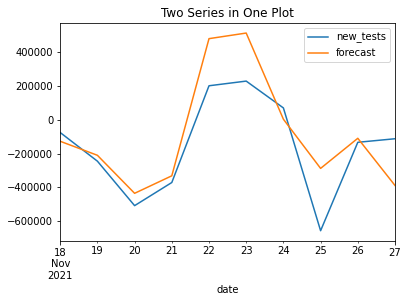

RMSE :  38797234992.19367
MAE :  150020.78789241528
MAPE :  0.7866650584729176


In [47]:
forecast = model_fit.forecast(steps=10, exog=test_exog)

plt.figure(figsize=(10, 6))
test_diff.plot(label='true', legend=True)
forecast.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff['new_tests'], forecast))
print('MAE : ', mean_absolute_error(test_diff['new_tests'], forecast))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_tests'], forecast))

<Figure size 720x432 with 0 Axes>

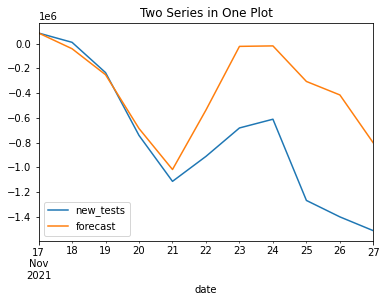

RMSE :  303953890426.58203
MAE :  409597.4920876221
MAPE :  0.8674023924703996


In [48]:
date = train_diff.iloc[-1].name
values = train_diff.iloc[-1].to_dict()

test_diff_ori = test_diff.copy()
test_diff_ori.loc[date] = values
test_diff_ori = test_diff_ori.sort_index().cumsum()[1:]

front = pd.Series(values.values(), index=[date])
forecast_ori = pd.concat([front, forecast])
forecast_ori = forecast_ori.sort_index().cumsum()[1:]

plt.figure(figsize=(10, 6))
test_diff_ori.plot(label='true', legend=True)
forecast_ori.plot(label='forecast', legend=True)
plt.title("Two Series in One Plot")
plt.show()

print('RMSE : ', mean_squared_error(test_diff_ori['new_tests'], forecast_ori))
print('MAE : ', mean_absolute_error(test_diff_ori['new_tests'], forecast_ori))
print('MAPE : ', mean_absolute_percentage_error(test_diff_ori['new_tests'], forecast_ori))

### VAR (벡터 자기 회귀 모형)
Vector Atuo Regression 모델은 종속변수가 1개가 아닌 여러 개일 경우에 사용합니다. 예를 들어 위의 에시에서 1. 신규 확진자수와 2. 신규 백신 수를 예측할 때 사용합니다. 따라서 외생변수와는 다르게 모든 변수에 adf 테스트와 전처리가 필요합니다.


In [49]:
df_us = df[df['location'] == 'United States'][['date','new_tests', 'new_vaccinations']]
df_us['date'] = pd.to_datetime(df_us.date)
df_us = df_us[(df_us['new_tests'] > 0) & (df_us['new_vaccinations'] > 0)]
# df_us['total_cases'] = np.log(df_us['total_cases'])
df_us = df_us.set_index('date')
df_us = df_us.fillna(0)
df_us

,new_tests,new_vaccinations
date,,
2020-12-14,1493420.0,4336.0
2020-12-15,1944523.0,48761.0
2020-12-16,2076498.0,158880.0
2020-12-17,2052239.0,270623.0
2020-12-18,2021374.0,413154.0
...,...,...
2021-11-23,1119437.0,1395130.0
2021-11-24,1190107.0,976872.0
2021-11-25,533235.0,16660.0


<AxesSubplot:>

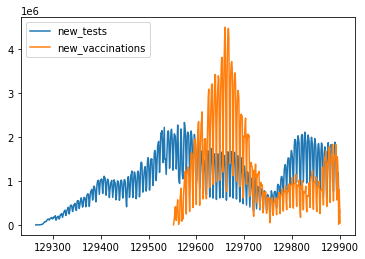

In [50]:
df[df['location'] == 'United States'][['date','new_tests', 'new_vaccinations']].plot()

<AxesSubplot:xlabel='date'>

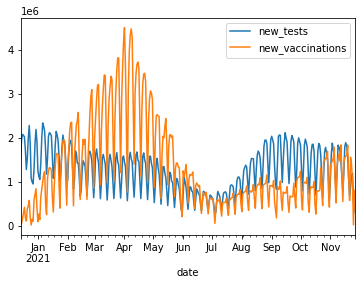

In [51]:
df_us.plot()

In [52]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -1.325753
p-value: 0.617310
귀무가설 채택, 단위근 존재 O, 정상성 만족 X

new_vaccinations ADF-Test
ADF Statistic: -1.529321
p-value: 0.518960
귀무가설 채택, 단위근 존재 O, 정상성 만족 X



In [53]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column].diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -3.665496
p-value: 0.004626
귀무가설 기각, 단위근 존재 X, 정상성을 만족

new_vaccinations ADF-Test
ADF Statistic: -3.966509
p-value: 0.001596
귀무가설 기각, 단위근 존재 X, 정상성을 만족



In [54]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(np.log(df_us[column]))

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -1.203767
p-value: 0.671973
귀무가설 채택, 단위근 존재 O, 정상성 만족 X

new_vaccinations ADF-Test
ADF Statistic: -2.286518
p-value: 0.176353
귀무가설 채택, 단위근 존재 O, 정상성 만족 X



In [55]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(np.log(df_us[column]).diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -2.111757
p-value: 0.239813
귀무가설 채택, 단위근 존재 O, 정상성 만족 X

new_vaccinations ADF-Test
ADF Statistic: -9.902225
p-value: 0.000000
귀무가설 기각, 단위근 존재 X, 정상성을 만족



In [80]:
us_diff = df_us.diff()[1:]
train_diff = us_diff[:-10]
test_diff = us_diff[-10:]

In [57]:
from statsmodels.tsa.api import VAR

model = VAR(train_diff)
model_fit = model.fit(maxlags=1)

model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 26, Aug, 2023
Time:                     11:16:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    50.9004
Nobs:                     337.000    HQIC:                   50.8595
Log likelihood:          -9515.62    FPE:                1.19187e+22
AIC:                      50.8324    Det(Omega_mle):     1.17093e+22
--------------------------------------------------------------------
Results for equation new_tests
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                    -932.431579     16188.580005           -0.058           0.954
L1.new_tests                0.242554         0.071450            3.395           0.001
L1.new_vaccinations         0.11

grid_search

In [58]:
lags = []
for i in range(20):
    model_fit = model.fit(maxlags=i)
    aic = model_fit.aic
    bic = model_fit.bic
    lags.append((i, aic, bic))
sorted(lags, key=lambda x: (x[-2], x[-1]))

[(14, 47.047924207123486, 47.72472397229619),
 (15, 47.06238097332434, 47.78750309109463),
 (12, 47.07094140206903, 47.651753883873745),
 (13, 47.077663920771315, 47.706361027989175),
 (16, 47.08057526995424, 47.85424111469316),
 (17, 47.0904693317394, 47.91290197541261),
 (11, 47.09132357262814, 47.624467816852224),
 (19, 47.10058715081713, 48.021229489429096),
 (18, 47.11094018819957, 47.982364418476884),
 (10, 47.202659969392606, 47.68835073631984),
 (9, 47.22173558819506, 47.66018602749318),
 (8, 47.2386289689727, 47.63005063640197),
 (7, 47.2947442104682, 47.63934708436945),
 (6, 47.99775311736915, 48.2957456149349),
 (5, 48.31363838127566, 48.565227374607694),
 (4, 48.98157428616168, 49.18696511811851),
 (3, 49.788101389166016, 49.947497889003486),
 (2, 49.98717670890987, 50.1007812077183),
 (1, 50.832391987500266, 50.900405333441256),
 (0, 51.08073694341095, 51.103358516757)]

In [59]:
model = VAR(train_diff)
model_fit = model.fit(maxlags=14)

model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 26, Aug, 2023
Time:                     11:16:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    47.7247
Nobs:                     324.000    HQIC:                   47.3181
Log likelihood:          -8483.24    FPE:                2.71064e+20
AIC:                      47.0479    Det(Omega_mle):     2.28356e+20
--------------------------------------------------------------------
Results for equation new_tests
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      142.764290      5294.494893            0.027           0.978
L1.new_tests                -0.108319         0.065643           -1.650           0.099
L1.new_vaccinations         

In [60]:
lags = model_fit.k_ar
train_diff.values[-lags:]

array([[-138911.,   59770.],
       [-161672.,  253833.],
       [-470796., -821273.],
       [-279910., -445677.],
       [ 387043.,  842478.],
       [ 619509.,  161925.],
       [ -45620.,  107576.],
       [ -87106., -155029.],
       [-244229.,  366894.],
       [-356612., -744474.],
       [-332059., -545998.],
       [ 458827.,  887430.],
       [ 577337.,  102229.],
       [  85365.,   51145.]])

In [81]:
forecast = model_fit.forecast(y=train_diff.values[-lags:], steps=10)
forecast

array([[-136926.38573944, -108272.28921785],
       [-210564.92871529,  308384.80128972],
       [-424015.02007413, -738472.10290799],
       [-298435.18723117, -492283.39480688],
       [ 440738.58531396,  825619.50755711],
       [ 554136.88614968,  199305.70671577],
       [  93408.53975466,   70797.63306987],
       [-155321.17642899,  -98693.55173179],
       [-192674.13736504,  267272.50306547],
       [-419853.6296346 , -756331.88715982]])

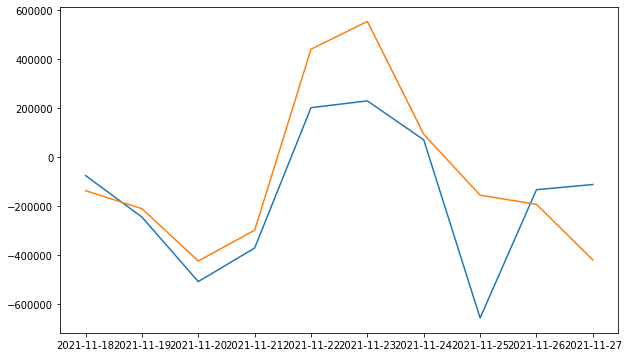

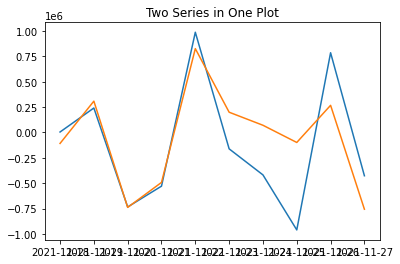


new_tests
RMSE :  53009719236.75003
MAE :  170823.6851507788
MAPE :  0.8207185765020515

new_vaccinations
RMSE :  153328552965.21
MAE :  294176.64631997584
MAPE :  3.2378426116562777


In [82]:
forecast = pd.DataFrame(forecast, columns=['new_tests_forecast', 'new_vaccinations_forecast'], index=test_diff.index)

plt.figure(figsize=(10, 6))

plt.plot(test_diff['new_tests'], label='new_tests')
plt.plot(forecast['new_tests_forecast'], label='new_tests_forecast')
plt.show()
plt.plot(test_diff['new_vaccinations'], label='new_vaccinations')
plt.plot(forecast['new_vaccinations_forecast'], label='new_vaccinations_forecast')
plt.title("Two Series in One Plot")
plt.show()

print('\nnew_tests')
print('RMSE : ', mean_squared_error(test_diff['new_tests'], forecast['new_tests_forecast']))
print('MAE : ', mean_absolute_error(test_diff['new_tests'], forecast['new_tests_forecast']))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_tests'], forecast['new_tests_forecast']))

print('\nnew_vaccinations')
print('RMSE : ', mean_squared_error(test_diff['new_vaccinations'], forecast['new_vaccinations_forecast']))
print('MAE : ', mean_absolute_error(test_diff['new_vaccinations'], forecast['new_vaccinations_forecast']))
print('MAPE : ', mean_absolute_percentage_error(test_diff['new_vaccinations'], forecast['new_vaccinations_forecast']))

In [84]:
forecast_ori

,new_tests,new_vaccinations,new_tests_forecast,new_vaccinations_forecast
2021-11-17,85365.0,51145.0,NaN,NaN
2021-11-18,NaN,NaN,-1.369264e+05,-1.082723e+05
2021-11-19,NaN,NaN,-3.474913e+05,2.001125e+05
2021-11-20,NaN,NaN,-7.715063e+05,-5.383596e+05
2021-11-21,NaN,NaN,-1.069942e+06,-1.030643e+06
2021-11-22,NaN,NaN,-6.292029e+05,-2.050235e+05
2021-11-23,NaN,NaN,-7.506605e+04,-5.717771e+03
2021-11-24,NaN,NaN,1.834249e+04,6.507986e+04
2021-11-25,NaN,NaN,-1.369787e+05,-3.361369e+04
2021-11-26,NaN,NaN,-3.296528e+05,2.336588e+05


In [89]:
values.values()

dict_values([85365.0, 51145.0])

In [94]:
front = pd.DataFrame(values, index=[date]).rename({'new_tests':'new_tests_forecast', 'new_vaccinations':'new_vaccinations_forecast'}, axis=1)
front

,new_tests_forecast,new_vaccinations_forecast
2021-11-17,85365.0,51145.0


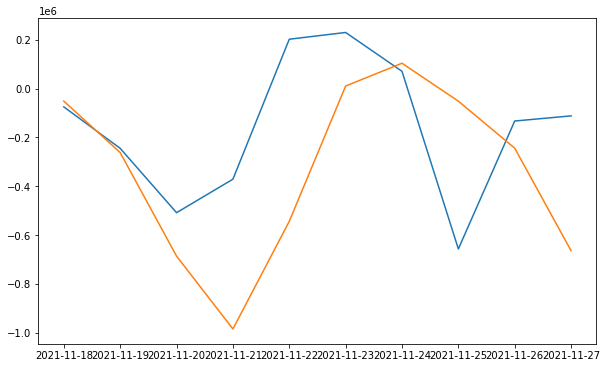

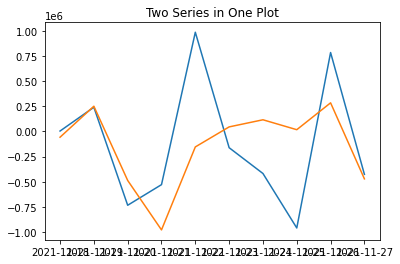


new_tests
RMSE :  469094331714.08563
MAE :  527401.2381344268
MAPE :  1.1247819406069144

new_vaccinations
RMSE :  441843049170.3784
MAE :  450305.9970915631
MAPE :  1.6478811144551497


In [97]:
date = train_diff.iloc[-1].name
values = train_diff.iloc[-1].to_dict()

test_diff_ori = test_diff.copy()
test_diff_ori.loc[date] = values
test_diff_ori = test_diff_ori.sort_index().cumsum()[1:]

front = pd.DataFrame(values, index=[date]).rename({'new_tests':'new_tests_forecast', 'new_vaccinations':'new_vaccinations_forecast'}, axis=1)
forecast_ori = pd.concat([front, forecast])
forecast_ori = forecast_ori.sort_index().cumsum()[1:]

plt.figure(figsize=(10, 6))
plt.plot(test_diff['new_tests'], label='new_tests')
plt.plot(forecast_ori['new_tests_forecast'], label='new_tests_forecast')
plt.show()
plt.plot(test_diff['new_vaccinations'], label='new_vaccinations')
plt.plot(forecast_ori['new_vaccinations_forecast'], label='new_vaccinations_forecast')
plt.title("Two Series in One Plot")
plt.show()

print('\nnew_tests')
print('RMSE : ', mean_squared_error(test_diff_ori['new_tests'], forecast_ori['new_tests_forecast']))
print('MAE : ', mean_absolute_error(test_diff_ori['new_tests'], forecast_ori['new_tests_forecast']))
print('MAPE : ', mean_absolute_percentage_error(test_diff_ori['new_tests'], forecast_ori['new_tests_forecast']))

print('\nnew_vaccinations')
print('RMSE : ', mean_squared_error(test_diff_ori['new_vaccinations'], forecast_ori['new_vaccinations_forecast']))
print('MAE : ', mean_absolute_error(test_diff_ori['new_vaccinations'], forecast_ori['new_vaccinations_forecast']))
print('MAPE : ', mean_absolute_percentage_error(test_diff_ori['new_vaccinations'], forecast_ori['new_vaccinations_forecast']))

### 시계열 XGBoost

XGBoost는 부스팅 계열의 모델입니다. 일반적으로 시계열에서도 해당 모델이 좋은 성능을 보입니다.

ML에서 시계열의 핵심은 데이터가 시계열이라는 feature를 줘야 한다는 것입니다.

그러기 위해서는 주기성을 나타내는 변수들을 생성해서 feature로 줘야 합니다.

예를 들어, 연, 월, 일, 1주일, 시간 등의 주기성을 categorical & sin(cos)으로 생성하여 정보를 줘야 합니다.

#### adf test를 시행해야 하는가?

adf 테스트는 정상성을 만족하기 위함입니다. 이는 선형 시계열을 가정하고 있기 때문에 일정한 주기가 있을 것이라고 가정하는 것과 동일합니다.

하지만, xgboost는 비선형 시계열이기 때문에 adf test를 진행하지 않아도 됩니다

adf test를 진행하여 정상성을 만족하면 더 좋은 성능을 보이는 경우도 있지만,

이는 feature engineering을 통해 feature를 더 잘 주입시킨 것일 뿐, 정상성과는 관련이 없습니다.

따라서, adf test는 Optional한 선택이므로 상황에 따라 적용하시면 됩니다.

,total_cases,total_deaths,new_tests,new_vaccinations
date,,,,
2020-01-22,1.0,0.0,0.0,0.0
2020-01-23,1.0,0.0,0.0,0.0
2020-01-24,2.0,0.0,0.0,0.0
2020-01-25,2.0,0.0,0.0,0.0
2020-01-26,5.0,0.0,0.0,0.0
...,...,...,...,...
2021-11-26,48176523.0,776349.0,400323.0,801941.0
2021-11-27,48201079.0,776536.0,288457.0,375204.0
2021-11-28,48229210.0,776639.0,0.0,49107.0


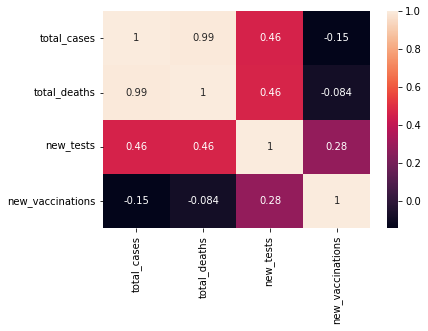

In [127]:
import seaborn as sns

df_us = df[df['location'] == 'United States']
df_us['date'] = pd.to_datetime(df_us.date)
df_us = df_us.drop(['location', 'population'], axis=1)
sns.heatmap(df_us.corr(), annot=True)
df_us = df_us.set_index('date')
df_us = df_us.fillna(0)
df_us

In [112]:
df_us['month'] = df_us.index.month
df_us['year'] = df_us.index.year
df_us['dayofweek'] = df_us.index.dayofweek

In [113]:
df_us

,total_cases,total_deaths,new_tests,new_vaccinations,month,year,dayofweek
date,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,1,2020,2
2020-01-23,1.0,0.0,0.0,0.0,1,2020,3
2020-01-24,2.0,0.0,0.0,0.0,1,2020,4
2020-01-25,2.0,0.0,0.0,0.0,1,2020,5
2020-01-26,5.0,0.0,0.0,0.0,1,2020,6
...,...,...,...,...,...,...,...
2021-11-26,48176523.0,776349.0,400323.0,801941.0,11,2021,4
2021-11-27,48201079.0,776536.0,288457.0,375204.0,11,2021,5
2021-11-28,48229210.0,776639.0,0.0,49107.0,11,2021,6


In [128]:
train = df_us[:-20]
dev = df_us[-20:-10]
test = df_us[-10:]

target = 'new_tests'
features = ['total_deaths', 'new_vaccinations']

train_x, train_y = train[features], train[target]
dev_x, dev_y = dev[features], dev[target]
test_x, test_y = test[features], test[target]

objective
- 기본값 : reg:squarederror
목적함수이다. 이 함수를 통해 나온 값이 최소화되는 방향으로 학습된다. 종류가 너무 다양해 자주 쓰는 것들만 설명하자면
- reg:squarederror / reg:squaredlogerror : 오차 제곱 / 오차 로그 제곱
- binary:logistic : 이항 분류(binary class)에 사용. 이항 분류는 대부분 이놈만 쓴다.
- multi:softmax / multi:softprob : 다항 분류(multi class)에 사용.
- rank:pairwise / rank:ndcg / rank:map : l2r에 사용

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

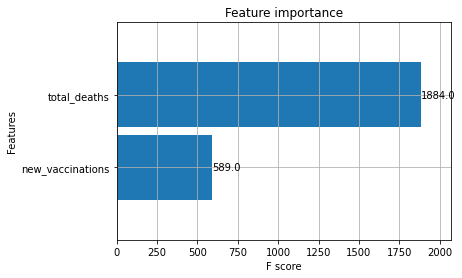

In [133]:
from xgboost import XGBRegressor, plot_importance

xgb_reg = XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(train_x, train_y, eval_set=[(dev_x, dev_y)], verbose=False)

# 주요하게 적용하는 변수를 판단
plot_importance(xgb_reg, height=0.9)

In [135]:
pred = xgb_reg.predict(test_x)
pred

array([ 964321.6, 1770404.6, 1568836.4, 1320855.6,  607093.2, 1166819.2,
        697490.3,  607093.2,  607093.2,  607093.2], dtype=float32)

<AxesSubplot:xlabel='date'>

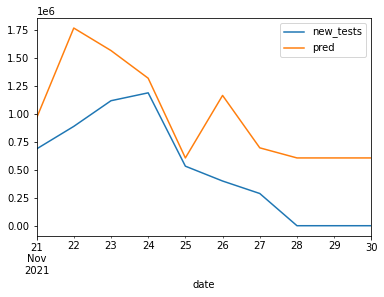

In [139]:
result = pd.DataFrame(test_y)
result['pred'] = pred
result.plot()

In [140]:
print('\nnew_tests')
print('RMSE : ', mean_squared_error(result['new_tests'], result['pred']))
print('MAE : ', mean_absolute_error(result['new_tests'], result['pred']))
print('MAPE : ', mean_absolute_percentage_error(result['new_tests'], result['pred']))



new_tests
RMSE :  293720917256.2863
MAE :  480820.05625
MAPE :  8.2023139590125e+20
